In [1]:
# Importing required libraries
import pandas as pd

# Loading the CSV file
file_path = 'benchmark_reqa.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure
data.head(10)

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score
0,iapp,NaN,0.0,0.455300,0.651121,0.714088,0.539562
1,iapp,th_aug,0.1,0.454470,0.646554,0.710352,0.536682
2,iapp,th_aug,0.2,0.453778,0.638666,0.705093,0.532926
3,iapp,th_aug,0.3,0.452117,0.634099,0.701218,0.529531
4,iapp,th_aug,0.4,0.447135,0.627872,0.695821,0.523743
5,iapp,th_aug,0.5,0.443676,0.619983,0.690008,0.518195
6,iapp,th_aug,0.6,0.441877,0.616662,0.685303,0.515370
7,iapp,th_aug,0.7,0.437033,0.613202,0.680044,0.510429
8,iapp,th_aug,0.8,0.434542,0.610435,0.677553,0.507732
9,iapp,th_aug,0.9,0.426931,0.601716,0.668143,0.498681


In [2]:
data["augment_col"].unique()

array([nan, 'th_aug', 'th_fasttext_aug', 'th_llm_gec_aug',
       'th_llm_paraphrase_aug', 'th_qcpg_0.2_aug',
       'th_qcpg_0.2_llm_gec_aug', 'th_qcpg_0.5_aug',
       'th_qcpg_0.5_llm_gec_aug', 'th_qcpg_0.8_aug',
       'th_qcpg_0.8_llm_gec_aug', 'th_wordnet_aug'], dtype=object)

In [3]:
# For each unique source get the highest scoring top_1
data.groupby(['source'])['top_1'].max()

source
iapp      0.455300
thaiqa    0.442360
tydiqa    0.353526
xquad     0.727966
Name: top_1, dtype: float64

In [4]:
data[data["augment_col"].isna()].groupby(['source'])['top_1'].max()

source
iapp      0.455300
thaiqa    0.441619
tydiqa    0.352642
xquad     0.726271
Name: top_1, dtype: float64

In [5]:
data["augment_col"] = data["augment_col"].fillna("original")

In [6]:
pretty_names = {
    "th_qcpg_0.8_llm_gec_aug": "QCPG (0.8) + LLM GEC",
    "th_qcpg_0.5_llm_gec_aug": "QCPG (0.5) + LLM GEC",
    "th_qcpg_0.2_llm_gec_aug": "QCPG (0.2) + LLM GEC",
    "th_qcpg_0.8_aug": "QCPG (0.8)",
    "th_qcpg_0.5_aug": "QCPG (0.5)",
    "th_qcpg_0.2_aug": "QCPG (0.2)",
    "th_aug": "Backtranslation",
    "th_fasttext_aug": "FastText",
    "th_llm_gec_aug": "LLM GEC",
    "th_llm_paraphrase_aug": "LLM Paraphrase",
    "th_ltw2v_aug": "LTW2Vec",
    "th_thai2fit_aug": "Thai2Fit",
    "th_wordnet_aug": "WordNet",
}

In [7]:
# Function to extract the augmentation ratio from the name
def get_augment_ratio(name):
    if name == "original":
        return "N/A" # Not applicable for the original model
    return name

# Function to extract the pretty name (augmentation name without ratio) from the name
def get_pretty_name(name):
    if name == "original":
        return "Original"
    return pretty_names[name]


In [8]:
unique_sources = data["source"].unique()
source_scores = {}

for source in unique_sources:

    # Find the best performing model for each augmentation type based on the "test_exact_match" metric
    # best_models = data.loc[data.groupby('augment_col')['top_1'].idxmax()]
    # = data[data["source"] == source].groupby(['augment_col'])['top_1'].max()

    filtered_data = data[data["source"] == source]
    best_models = filtered_data.loc[filtered_data.groupby('augment_col')['top_1'].idxmax()]

    # Resetting the index
    best_models.reset_index(drop=True, inplace=True)

    best_models['pretty_name'] = best_models['augment_col'].apply(get_pretty_name)

    source_scores[source] = best_models.copy()

source_scores

{'iapp':    source              augment_col  augment_ratio     top_1     top_5  \
 0    iapp                 original            0.0  0.455300  0.651121   
 1    iapp                   th_aug            0.1  0.454470  0.646554   
 2    iapp          th_fasttext_aug            0.1  0.454470  0.644063   
 3    iapp           th_llm_gec_aug            0.1  0.454885  0.644063   
 4    iapp    th_llm_paraphrase_aug            0.1  0.454608  0.645032   
 5    iapp          th_qcpg_0.2_aug            0.1  0.447966  0.642956   
 6    iapp  th_qcpg_0.2_llm_gec_aug            0.1  0.448519  0.642541   
 7    iapp          th_qcpg_0.5_aug            0.1  0.445751  0.642679   
 8    iapp  th_qcpg_0.5_llm_gec_aug            0.1  0.451287  0.643648   
 9    iapp          th_qcpg_0.8_aug            0.1  0.450042  0.644063   
 10   iapp  th_qcpg_0.8_llm_gec_aug            0.1  0.450595  0.643510   
 11   iapp           th_wordnet_aug            0.1  0.454747  0.640327   
 
       top_10  mrr_score    

In [9]:
# Multiply by 100 to get the percentage
for source in source_scores:
    source_scores[source]["top_1"] = source_scores[source]["top_1"] * 100
    source_scores[source]["top_5"] = source_scores[source]["top_5"] * 100
    source_scores[source]["top_10"] = source_scores[source]["top_10"] * 100
    source_scores[source]["mrr_score"] = source_scores[source]["mrr_score"] * 100

source_scores

{'iapp':    source              augment_col  augment_ratio      top_1      top_5  \
 0    iapp                 original            0.0  45.530030  65.112095   
 1    iapp                   th_aug            0.1  45.446997  64.655411   
 2    iapp          th_fasttext_aug            0.1  45.446997  64.406311   
 3    iapp           th_llm_gec_aug            0.1  45.488514  64.406311   
 4    iapp    th_llm_paraphrase_aug            0.1  45.460836  64.503183   
 5    iapp          th_qcpg_0.2_aug            0.1  44.796568  64.295599   
 6    iapp  th_qcpg_0.2_llm_gec_aug            0.1  44.851924  64.254082   
 7    iapp          th_qcpg_0.5_aug            0.1  44.575145  64.267921   
 8    iapp  th_qcpg_0.5_llm_gec_aug            0.1  45.128702  64.364794   
 9    iapp          th_qcpg_0.8_aug            0.1  45.004152  64.406311   
 10   iapp  th_qcpg_0.8_llm_gec_aug            0.1  45.059507  64.350955   
 11   iapp           th_wordnet_aug            0.1  45.474675  64.032660   
 
  

In [10]:
data[data["source"] == "iapp"]

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score
0,iapp,original,0.0,0.455300,0.651121,0.714088,0.539562
1,iapp,th_aug,0.1,0.454470,0.646554,0.710352,0.536682
2,iapp,th_aug,0.2,0.453778,0.638666,0.705093,0.532926
3,iapp,th_aug,0.3,0.452117,0.634099,0.701218,0.529531
4,iapp,th_aug,0.4,0.447135,0.627872,0.695821,0.523743
...,...,...,...,...,...,...,...
106,iapp,th_wordnet_aug,0.6,0.449903,0.610711,0.681013,0.517142
107,iapp,th_wordnet_aug,0.7,0.446859,0.607667,0.677277,0.513063
108,iapp,th_wordnet_aug,0.8,0.443814,0.605453,0.673817,0.508411
109,iapp,th_wordnet_aug,0.9,0.439109,0.601439,0.668004,0.503694


In [11]:
source_scores["iapp"]

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score,pretty_name
0,iapp,original,0.0,45.530030,65.112095,71.408802,53.956150,Original
1,iapp,th_aug,0.1,45.446997,64.655411,71.035151,53.668186,Backtranslation
2,iapp,th_fasttext_aug,0.1,45.446997,64.406311,70.786050,53.551801,FastText
3,iapp,th_llm_gec_aug,0.1,45.488514,64.406311,70.855245,53.583433,LLM GEC
4,iapp,th_llm_paraphrase_aug,0.1,45.460836,64.503183,70.896762,53.652831,LLM Paraphrase
5,iapp,th_qcpg_0.2_aug,0.1,44.796568,64.295599,70.772211,53.060998,QCPG (0.2)
6,iapp,th_qcpg_0.2_llm_gec_aug,0.1,44.851924,64.254082,70.799889,53.161972,QCPG (0.2) + LLM GEC
7,iapp,th_qcpg_0.5_aug,0.1,44.575145,64.267921,70.619983,52.885024,QCPG (0.5)
8,iapp,th_qcpg_0.5_llm_gec_aug,0.1,45.128702,64.364794,70.606144,53.282118,QCPG (0.5) + LLM GEC
9,iapp,th_qcpg_0.8_aug,0.1,45.004152,64.406311,70.675339,53.253908,QCPG (0.8)


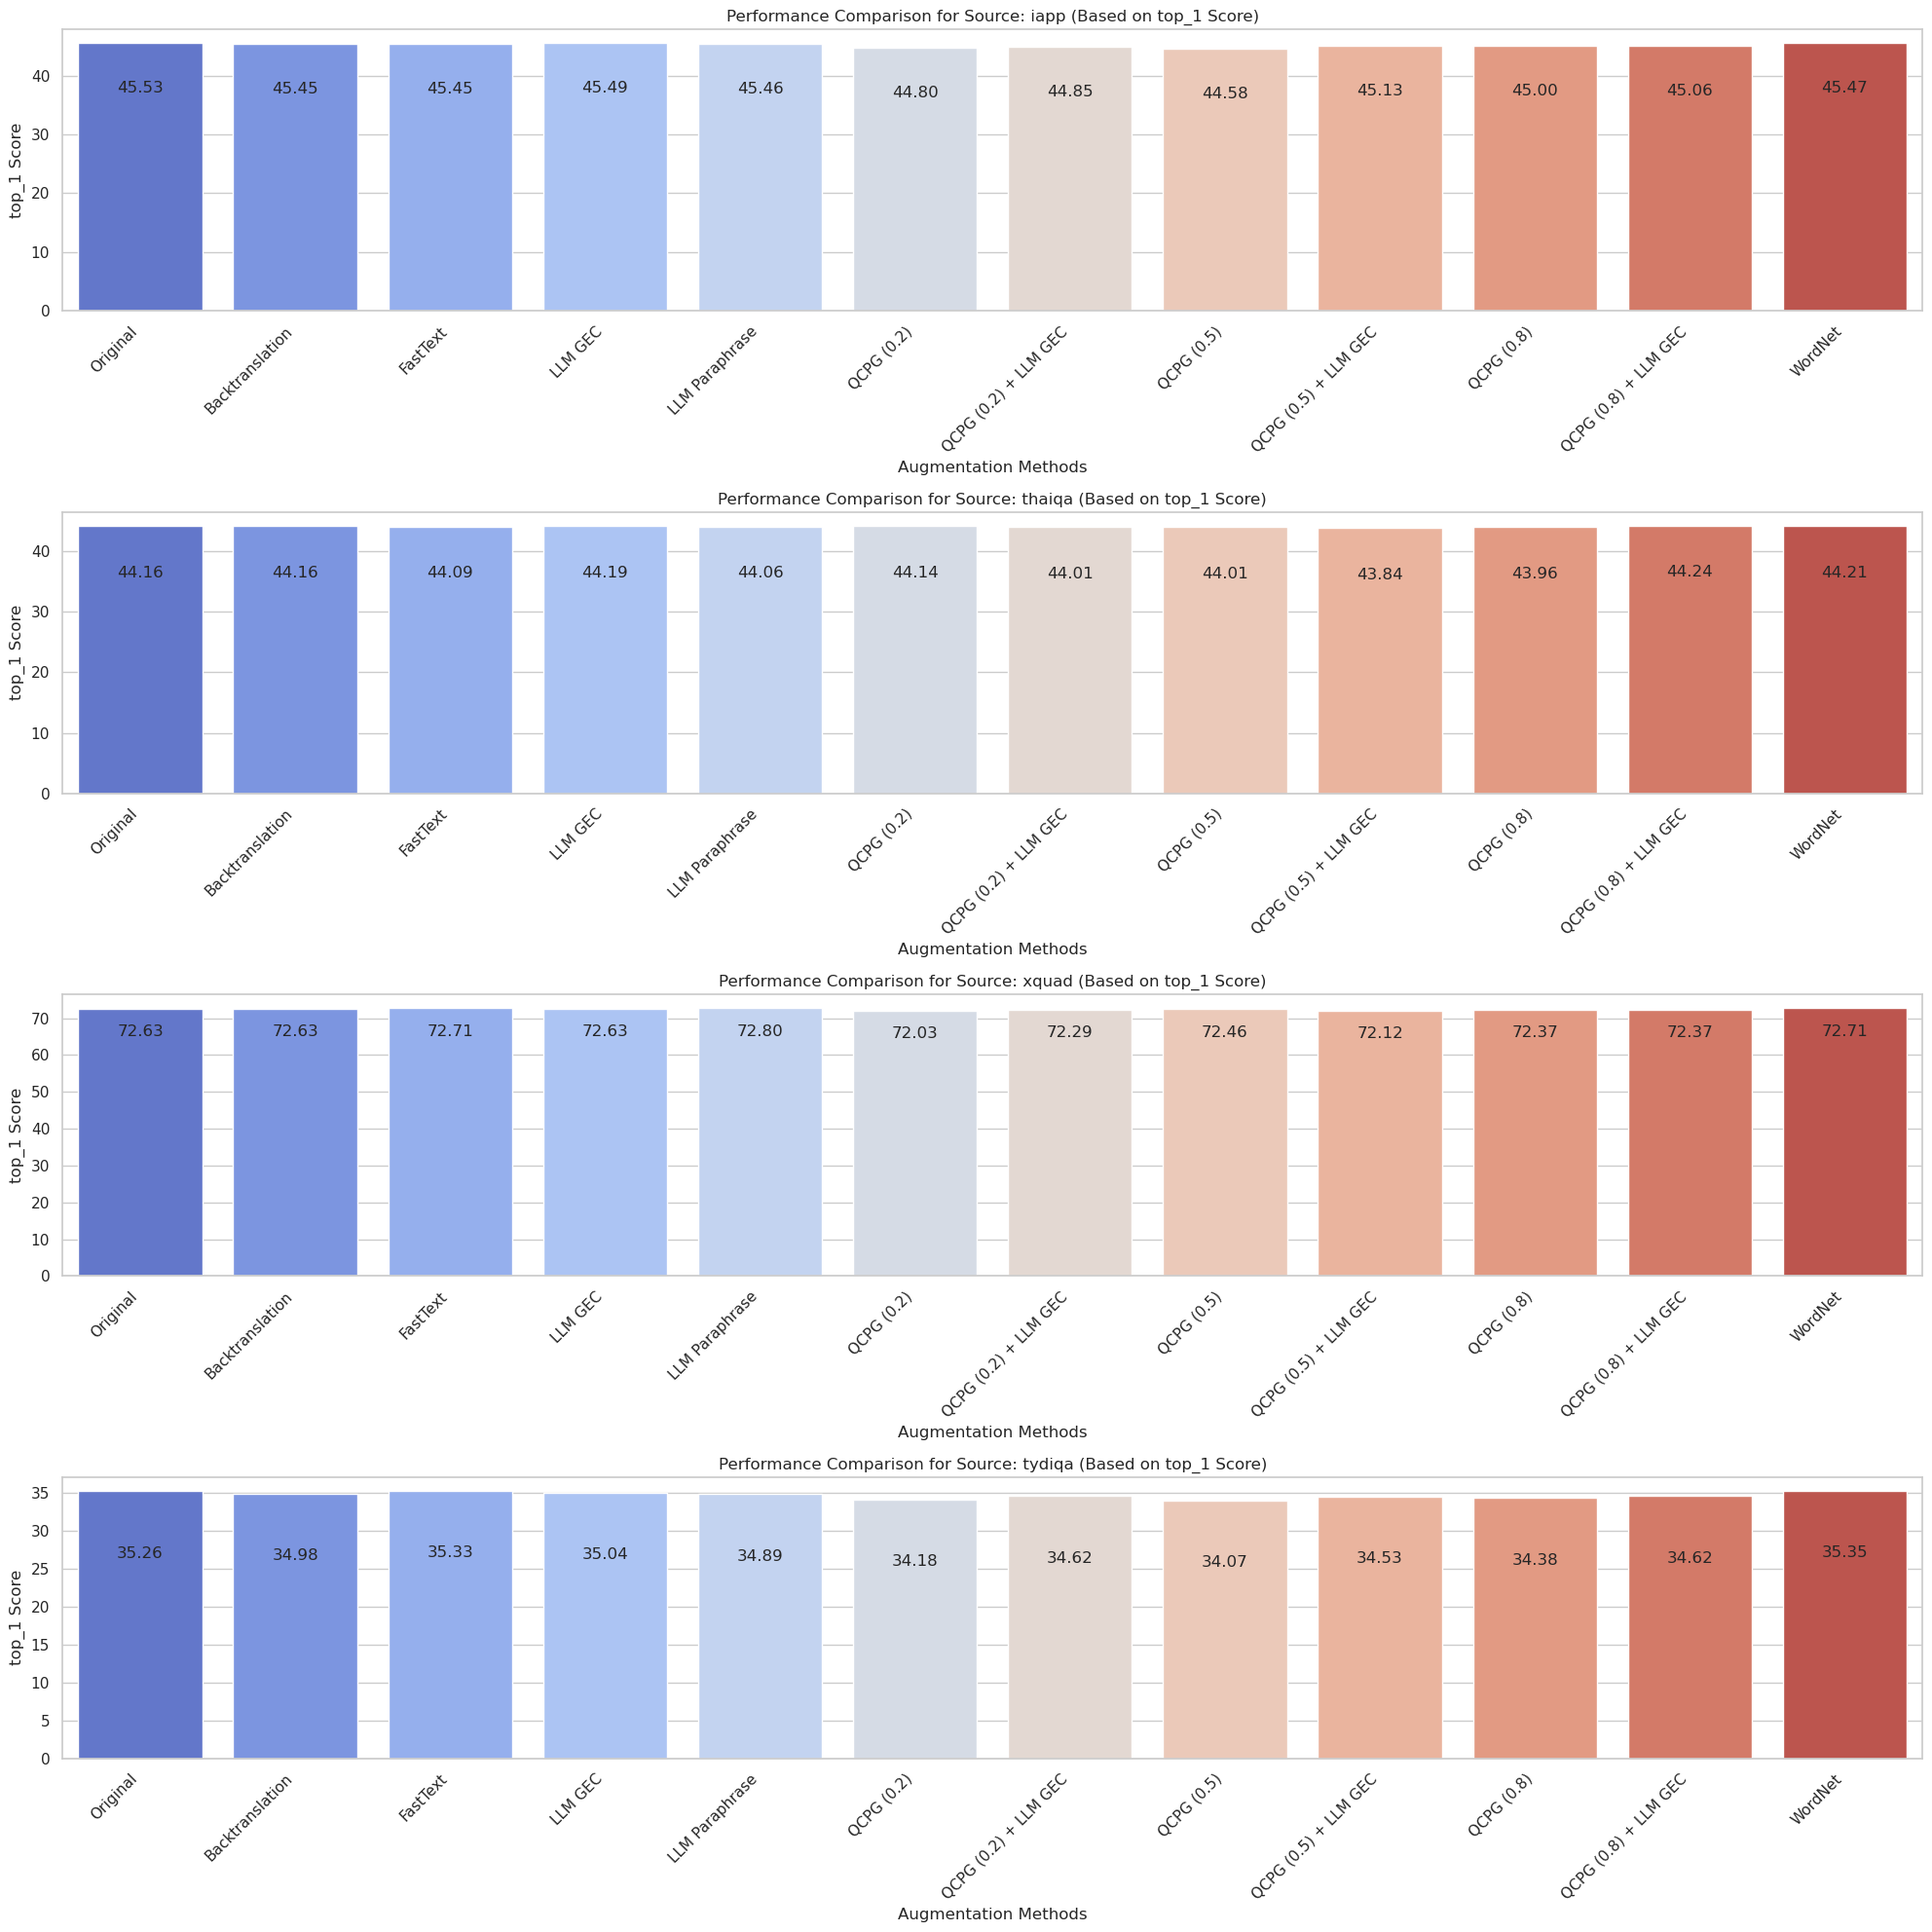

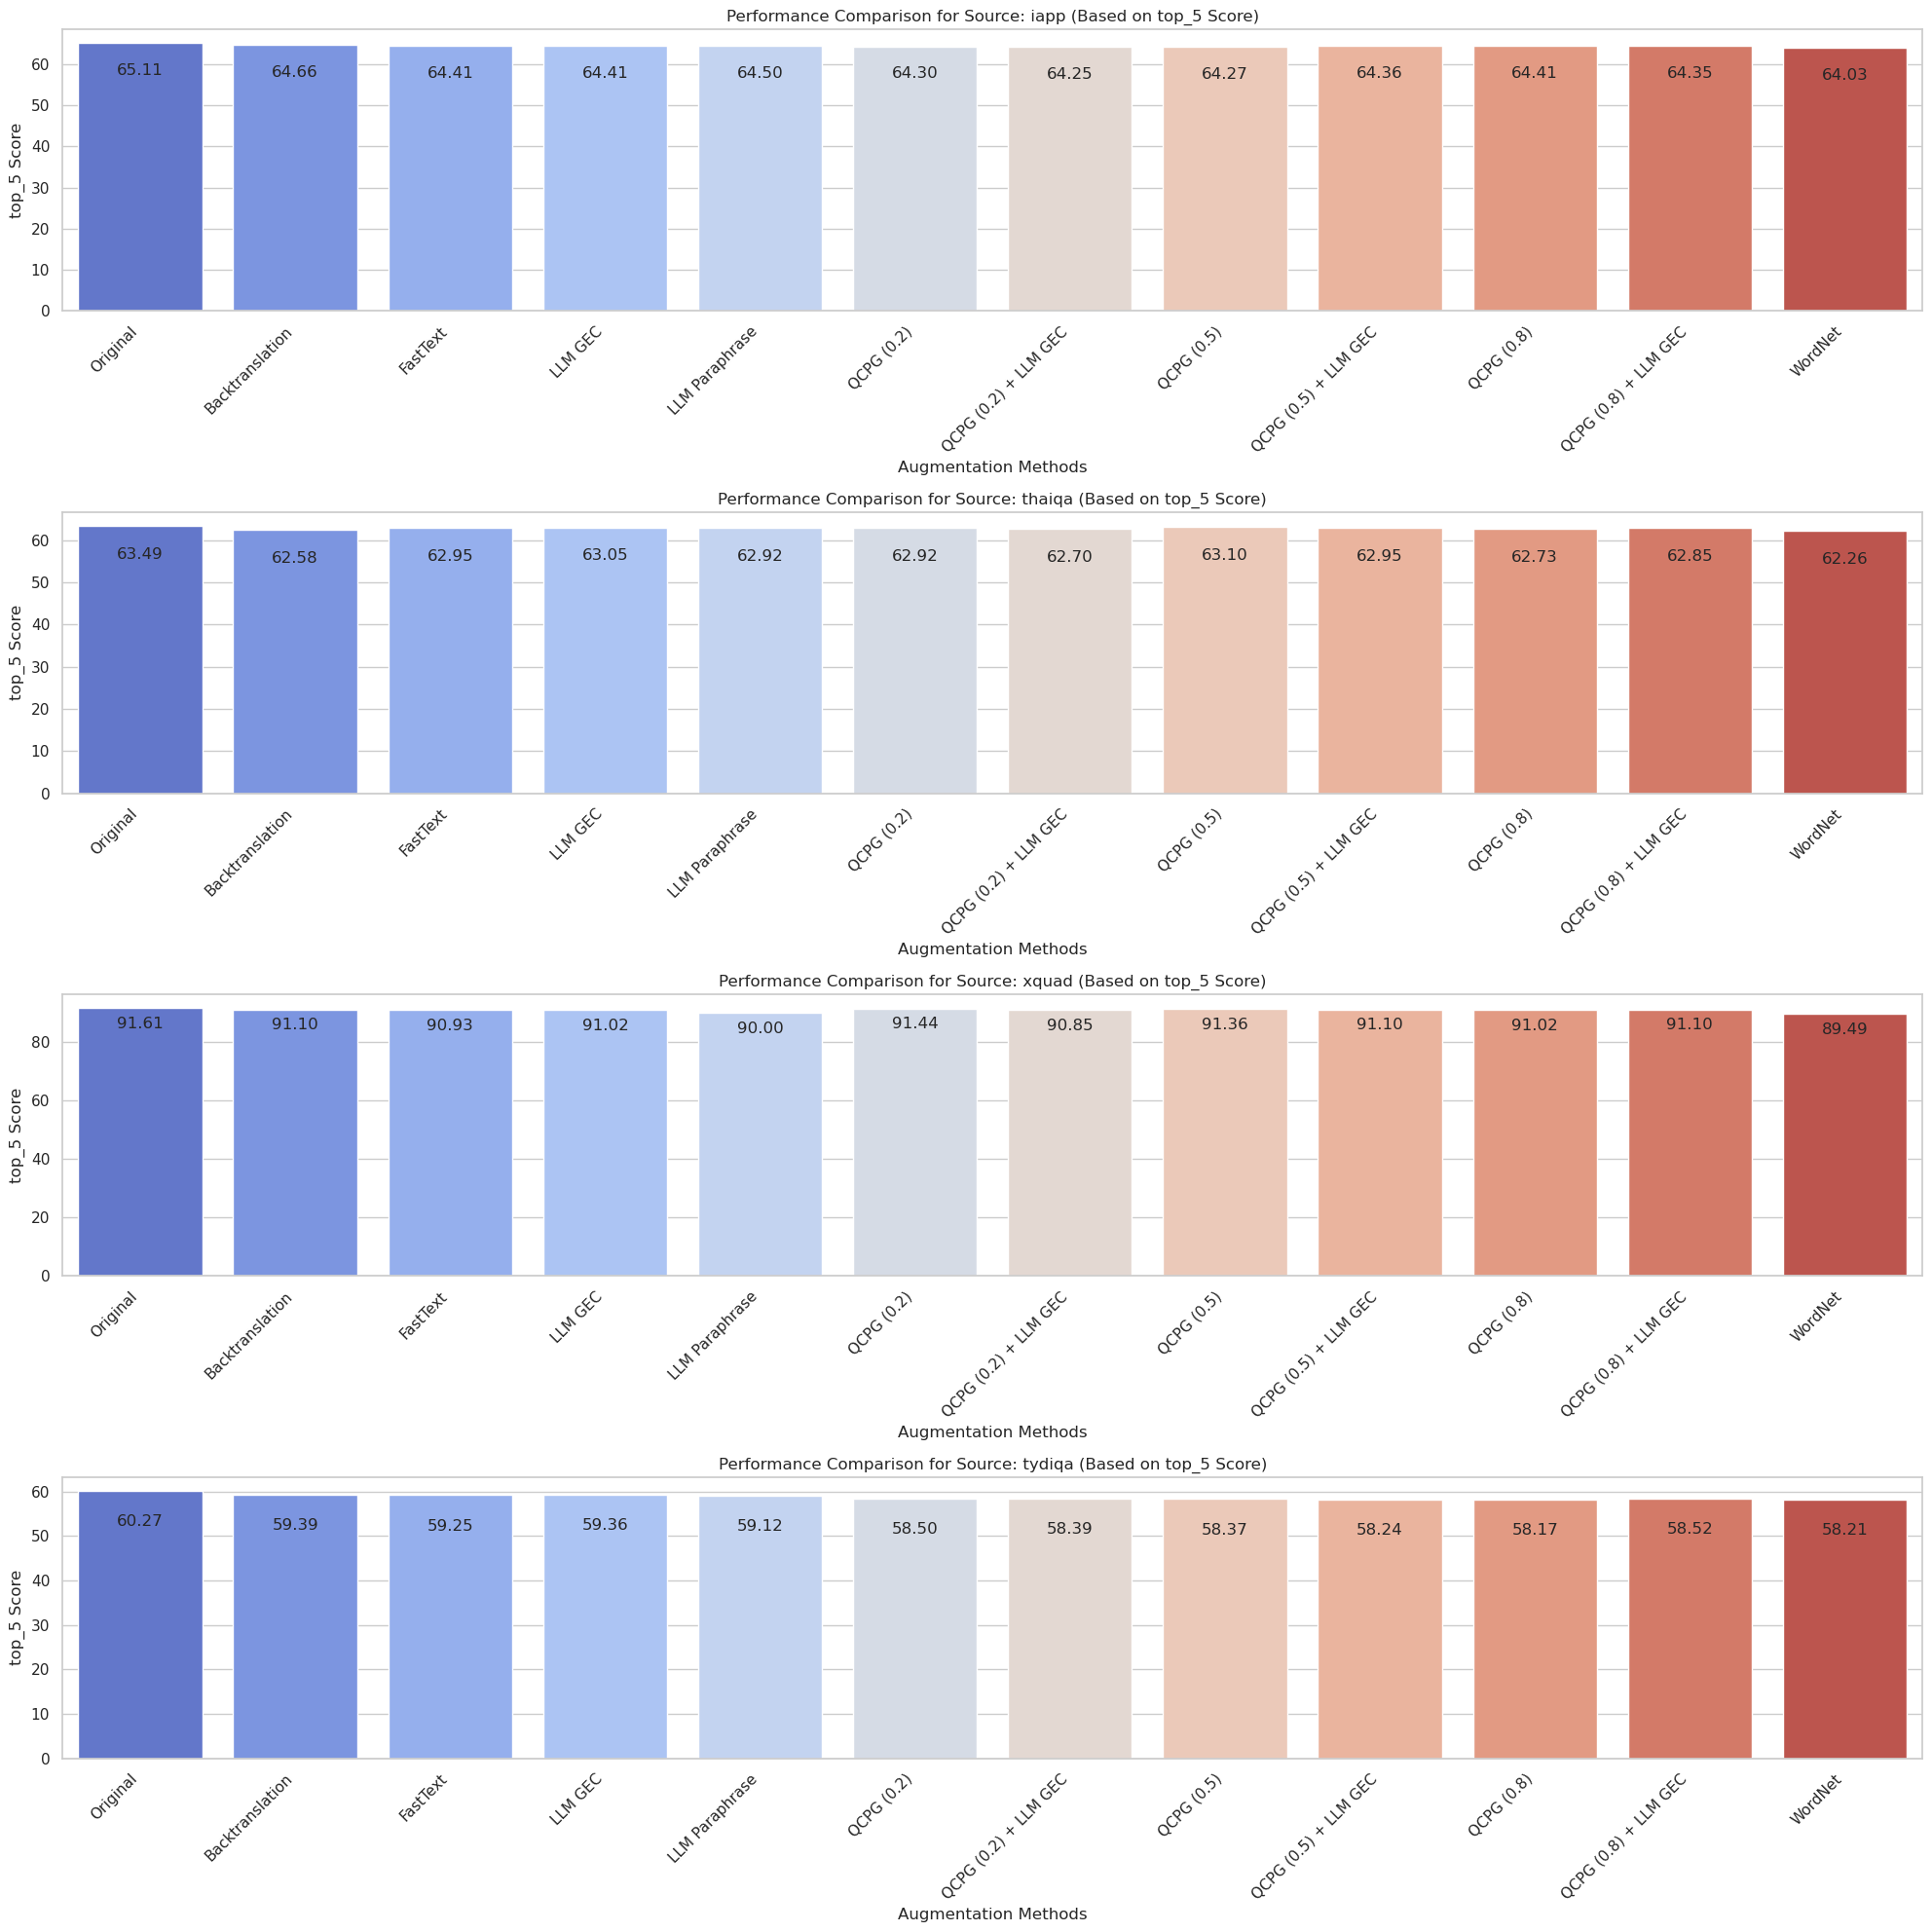

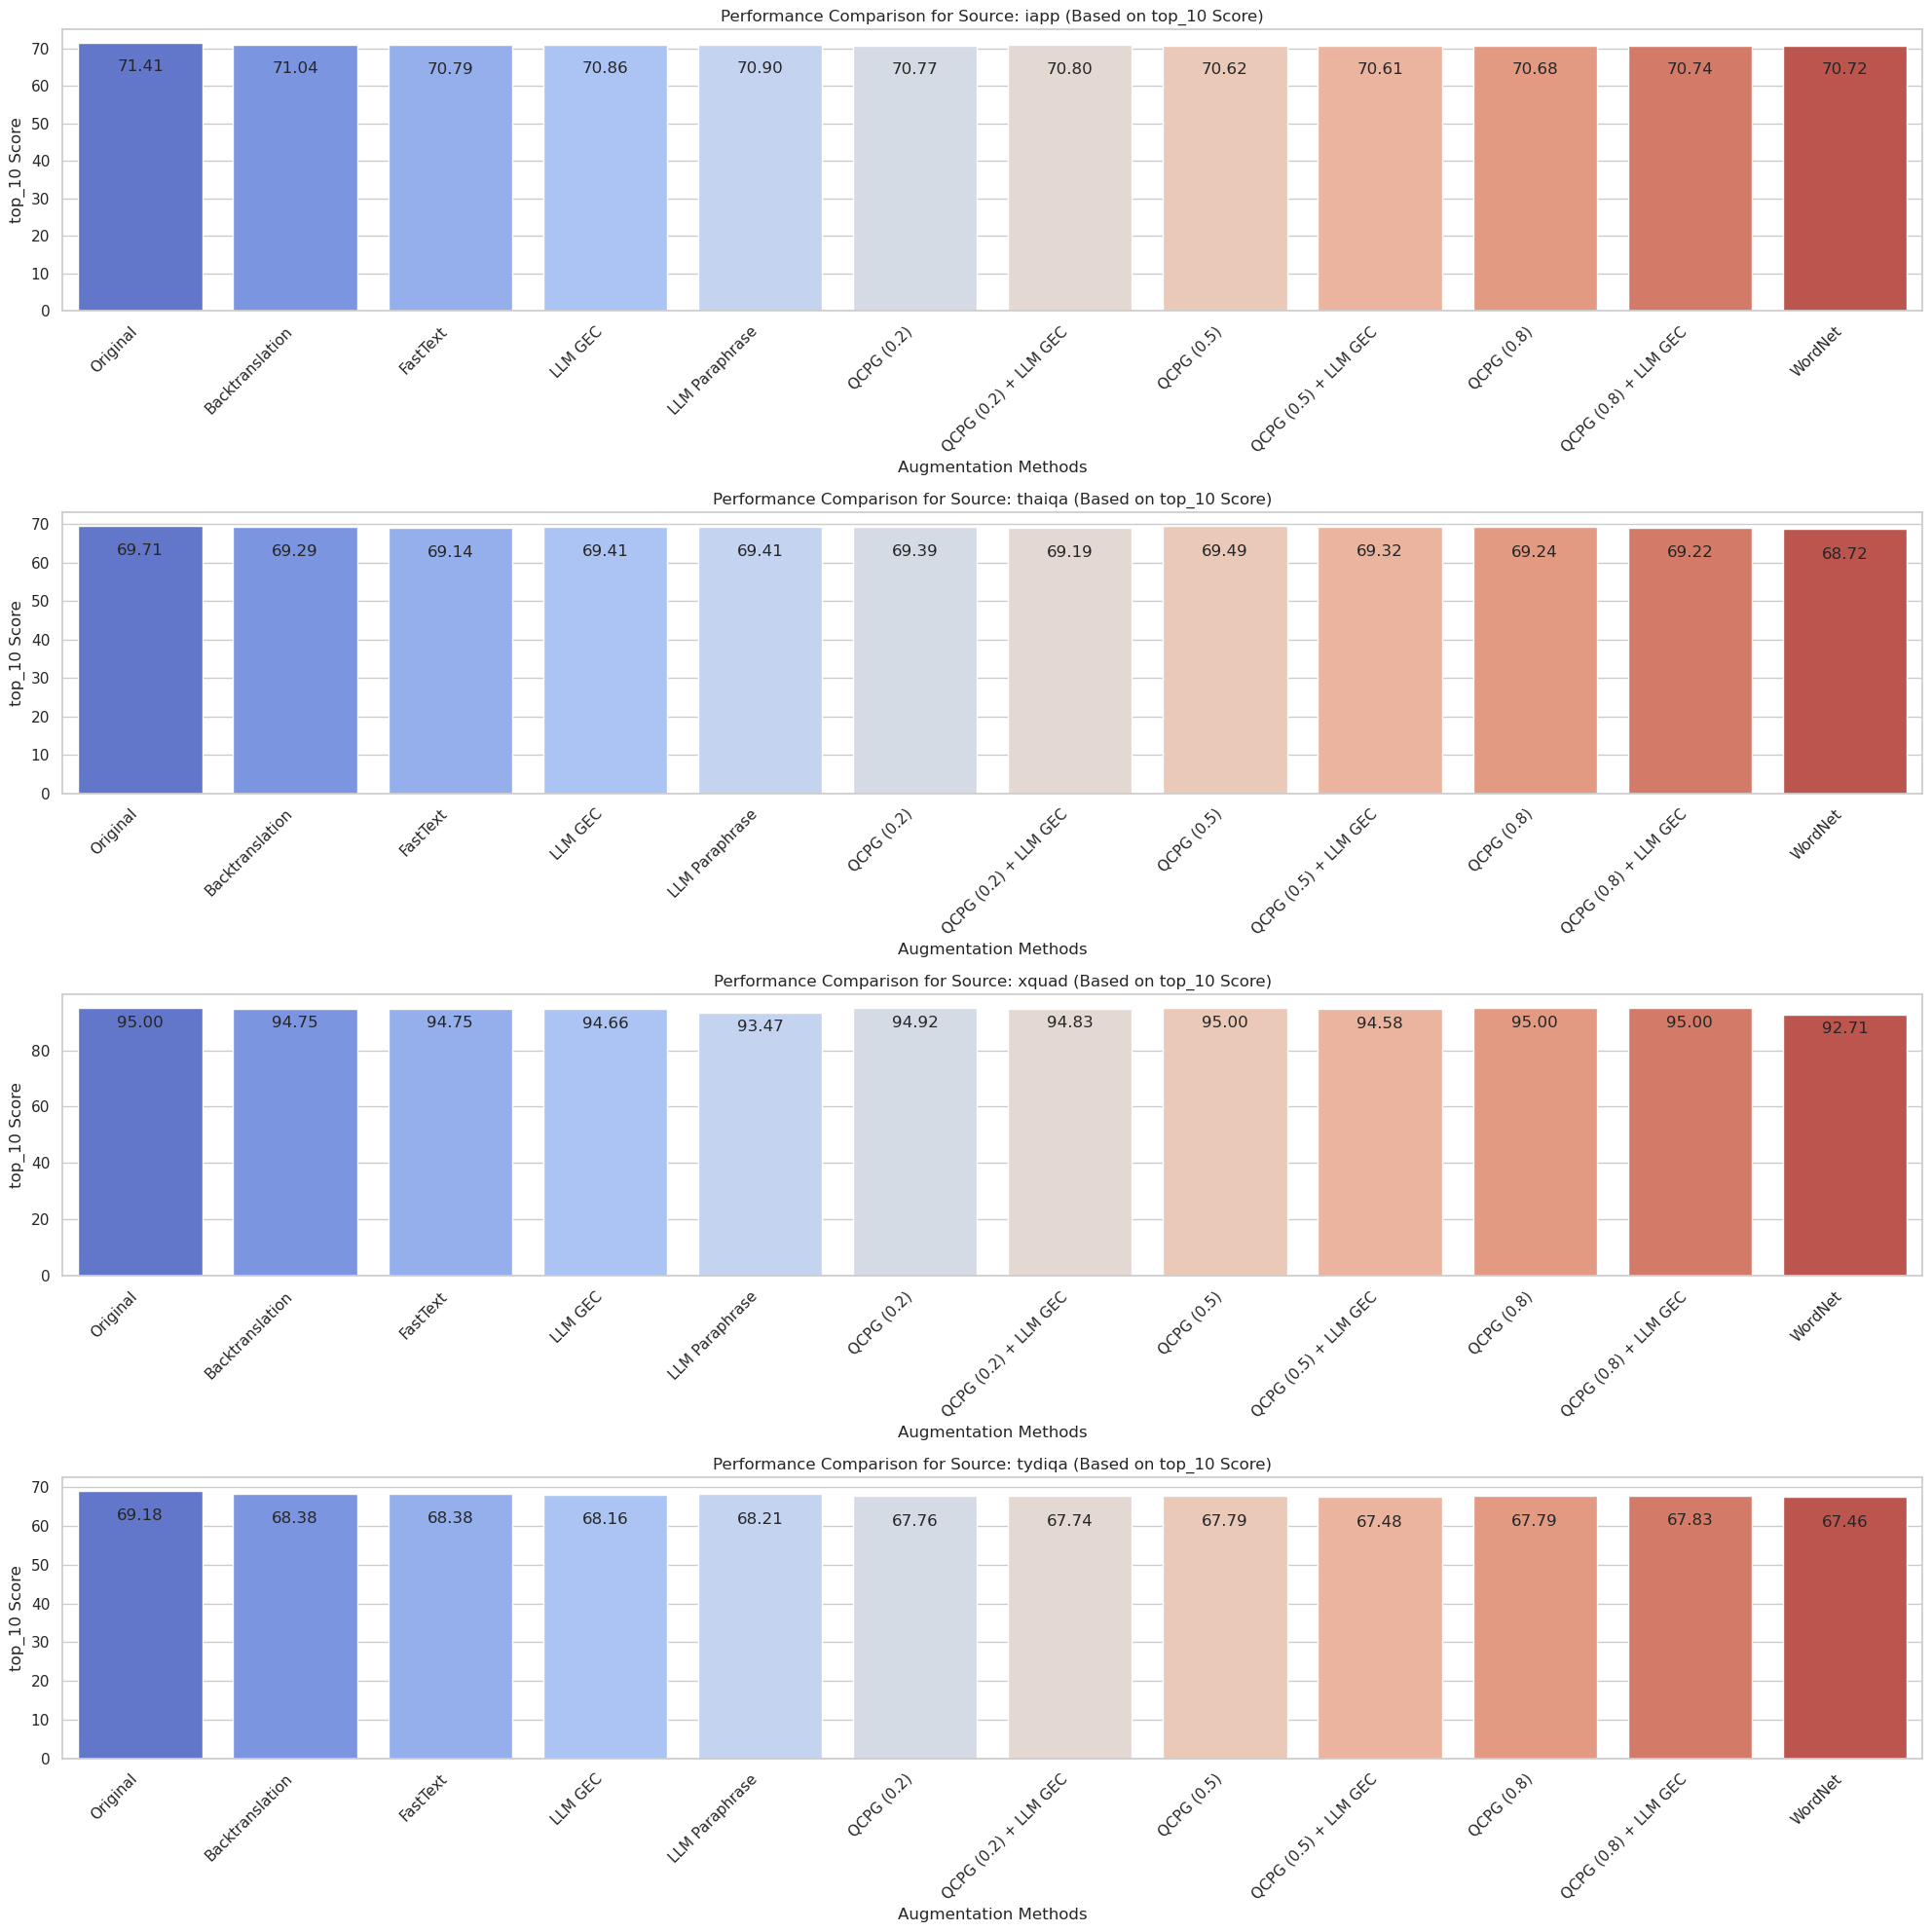

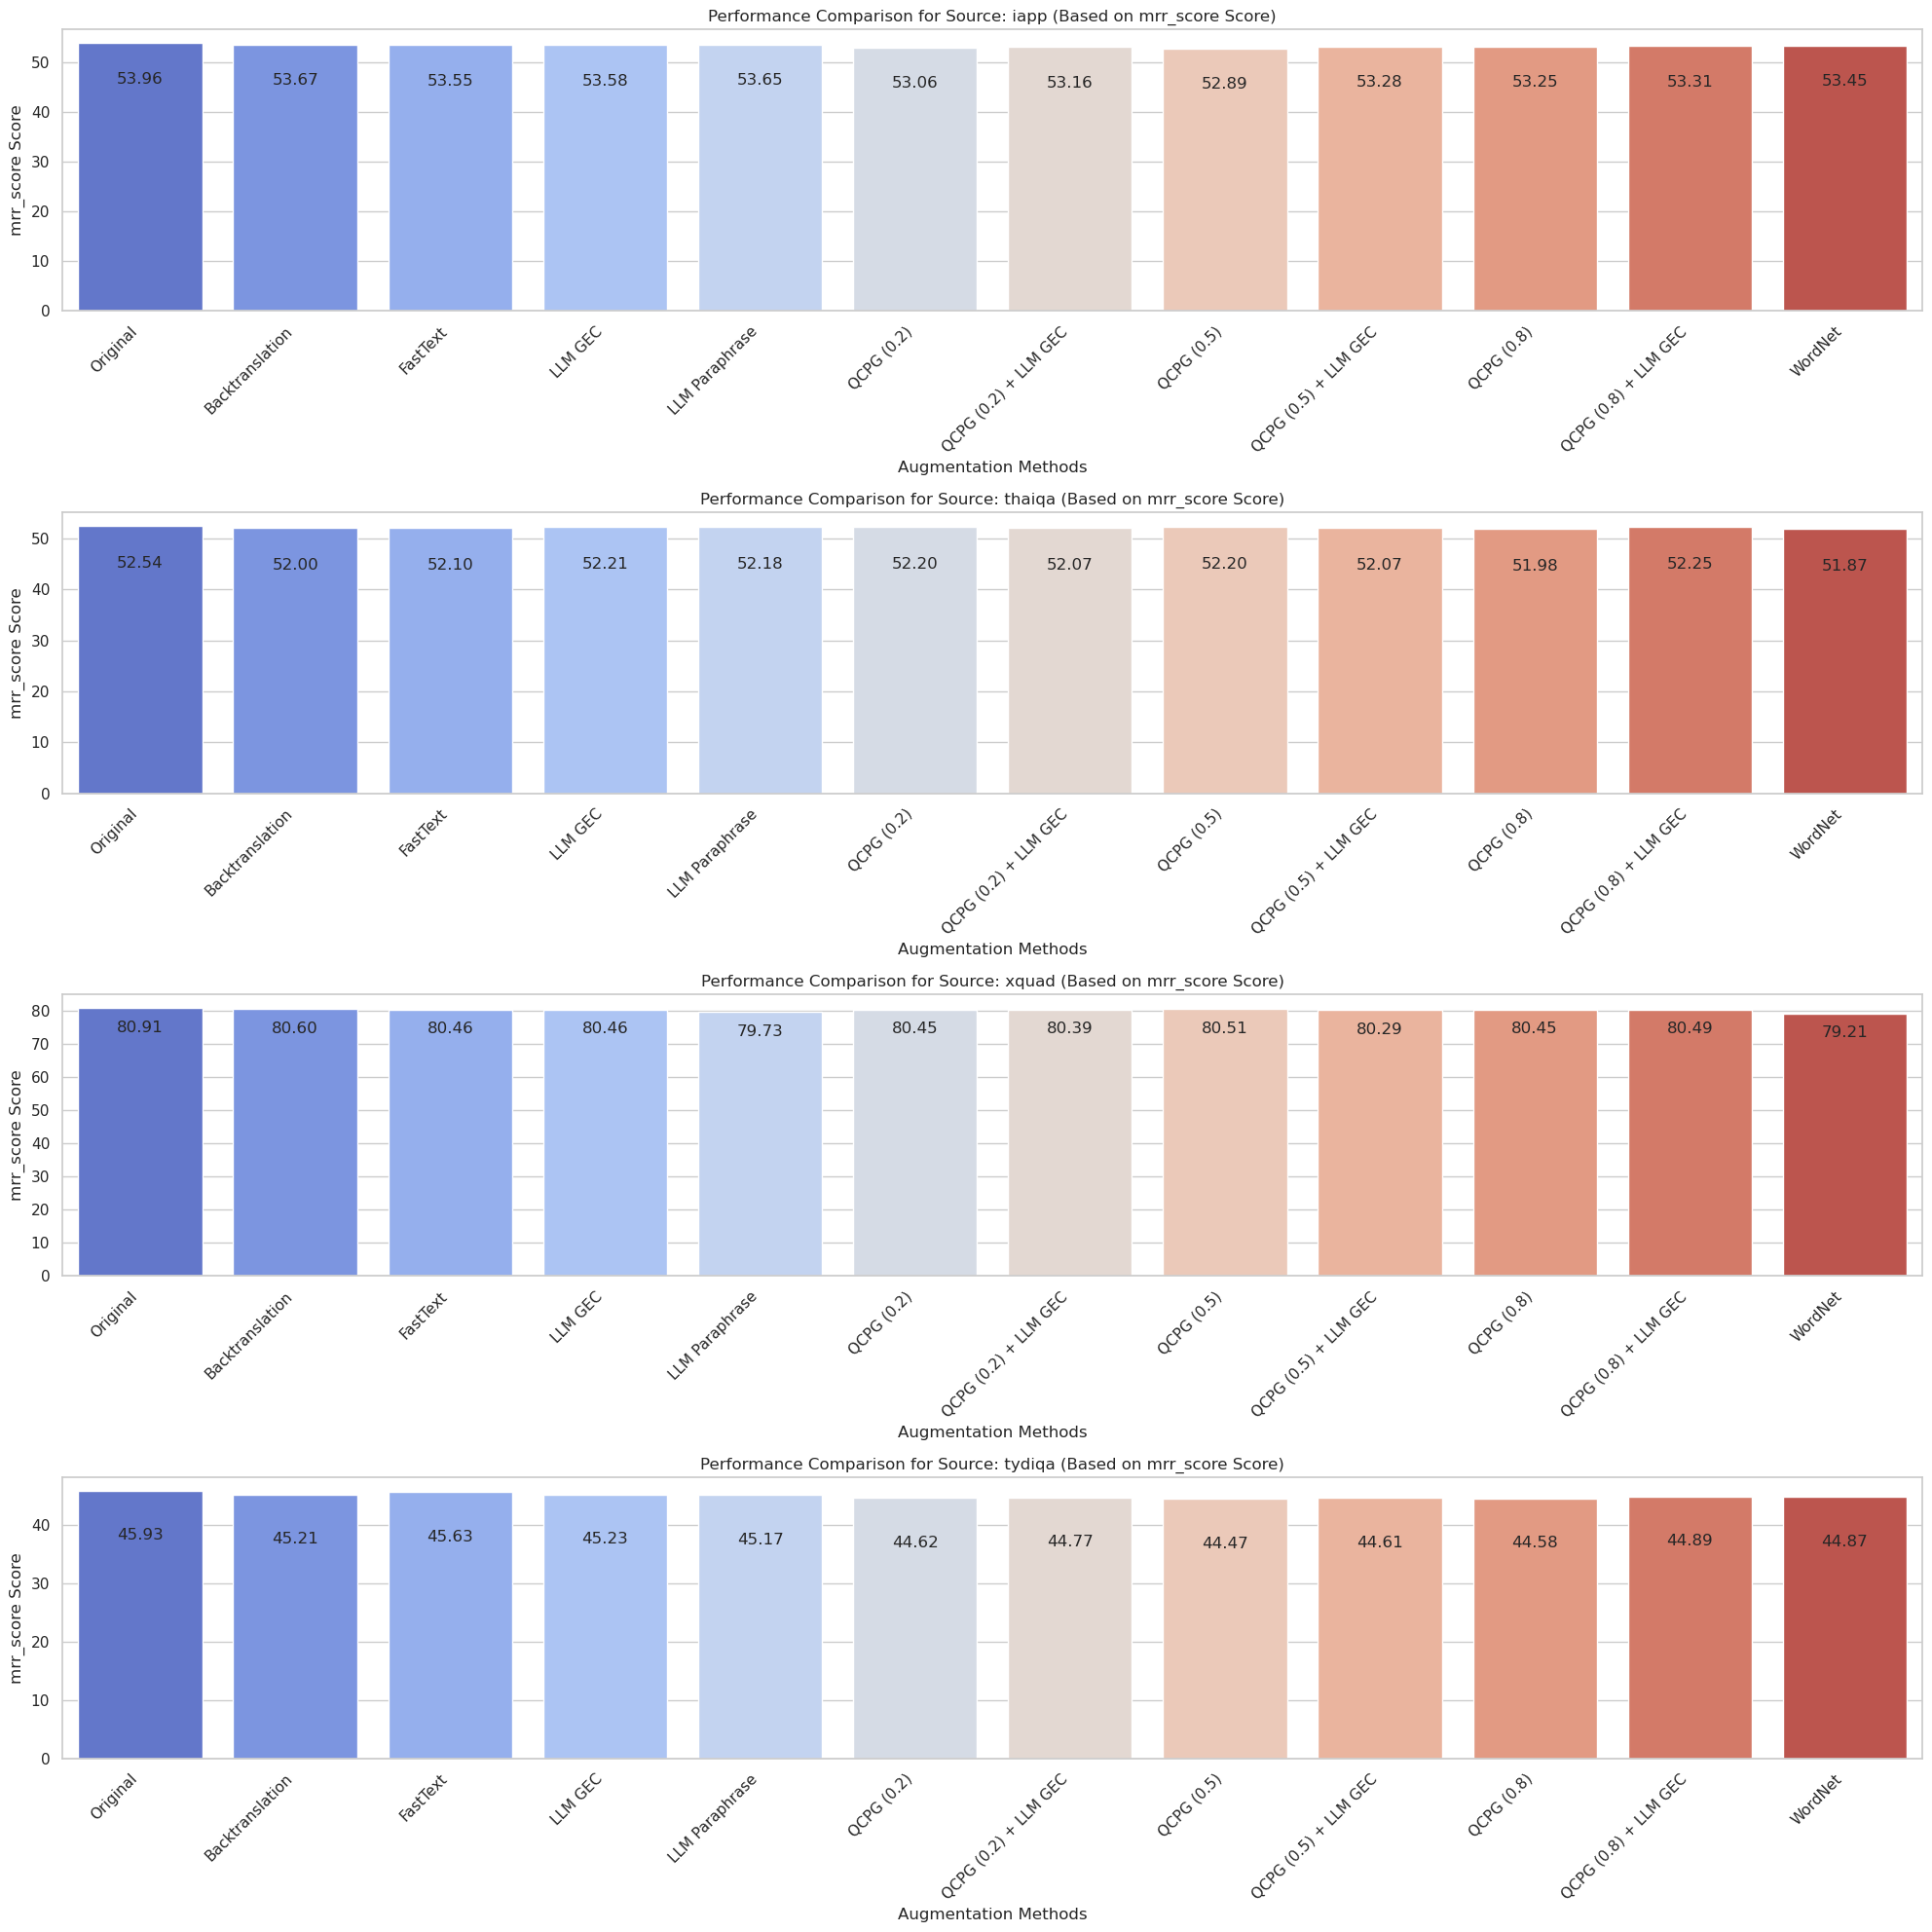

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_theme(style="whitegrid")

# Initialize the figure


# for index, (source, best_models_df) in enumerate(source_scores.items()):
#     plt.subplot(len(source_scores), 1, index + 1)
    
#     # Create a barplot for the 'top_1' metric
#     sns.barplot(data=best_models_df, x='pretty_name', y='top_1', palette='coolwarm')
    
#     # Add labels and title
#     plt.xlabel('Augmentation Methods')
#     plt.ylabel('Top-1 Score')
#     plt.title(f'Performance Comparison for Source: {source} (Based on Top-1 Score)')
#     plt.xticks(rotation=45, ha='right')
    
#     # Annotate each bar with the respective value
#     for p in plt.gca().patches:
#         plt.gca().annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height() - 10),
#                             ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Loop through each source to create a separate plot
for score in ['top_1', 'top_5', 'top_10', 'mrr_score']:
    plt.figure(figsize=(20, 20))
    for index, (source, best_models_df) in enumerate(source_scores.items()):
        plt.subplot(len(source_scores), 1, index + 1)
        
        # Create a barplot for the 'top_1' metric
        sns.barplot(data=best_models_df, x='pretty_name', y=score, palette='coolwarm')
        
        # Add labels and title
        plt.xlabel('Augmentation Methods')
        plt.ylabel(f'{score} Score')
        plt.title(f'Performance Comparison for Source: {source} (Based on {score} Score)')
        plt.xticks(rotation=45, ha='right')
        
        # Annotate each bar with the respective value
        for p in plt.gca().patches:
            plt.gca().annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height() - 10),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points') 
    
    plt.tight_layout()
    plt.show()

In [18]:
data.head(50)

,source,augment_col,augment_ratio,top_1,top_5,top_10,mrr_score
0,iapp,original,0.0,0.455300,0.524633,0.595212,0.483870
1,iapp,th_aug,0.0,0.414476,0.460006,0.532660,0.437138
2,iapp,th_aug,0.1,0.454193,0.521312,0.589676,0.481763
3,iapp,th_aug,0.2,0.453640,0.517714,0.583449,0.479971
4,iapp,th_aug,0.3,0.452117,0.513701,0.578605,0.477557
5,iapp,th_aug,0.4,0.447135,0.506504,0.571270,0.471900
6,iapp,th_aug,0.5,0.443537,0.495710,0.563797,0.467038
7,iapp,th_aug,0.6,0.441877,0.492250,0.560199,0.464928
8,iapp,th_aug,0.7,0.436341,0.486576,0.554664,0.459293
9,iapp,th_aug,0.8,0.434542,0.484916,0.552726,0.457484
